Authors: Niharika Patil

### This Jupyter Notebook file runs a Support Vector Regression (SVR) algorithm on ___ data. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
df=pd.read_csv('real_estate_dataset/realest_data.csv', index_col=False)

# rename the columns
df.columns=['transaction_date', 'house_age', 'nearest MRT dist.', 'convenience_stores','latitude', 'longitude',
                                    'price/ping']

# display the df
df.head()

,transaction_date,house_age,nearest MRT dist.,convenience_stores,latitude,longitude,price/ping
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [153]:
X=df.drop(columns=['price/ping'], axis=1)
y=df['price/ping']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
scaler = StandardScaler()

In [156]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)


SVR()

In [158]:
mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
avg_mse = -np.mean(mse_scores)
r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
avg_r2 = np.mean(r2_scores)

In [159]:
print(f"Cross-validated MSE: {avg_mse}")
print(f"Cross-validated R²: {avg_r2}")

Cross-validated MSE: 90.16224821017535
Cross-validated R²: 0.5248447017487732


In [160]:
y_pred_1 = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
rmse = round(np.sqrt(mse))


In [161]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 57.53810649062171
R² Score: 0.6570207790005518


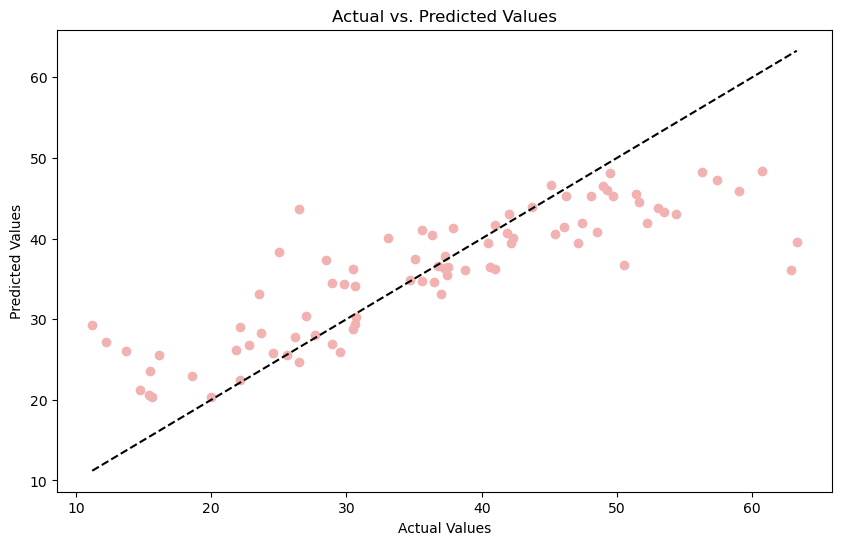

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, c='#f2b2b2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [163]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 150], # [0.1, 0.01, 1, 10],
    'epsilon': [0.01, 0.1, 0.5, 1, 2, 2.5], # [0.01, 0.1, 0.5, 1]
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'] 
}

In [164]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [165]:
best_svr = grid_search.best_estimator_
best_svr.fit(X_train_scaled, y_train)

SVR(C=100, epsilon=2)

In [166]:
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 32.95980343505408
R² Score: 0.8035297232401566


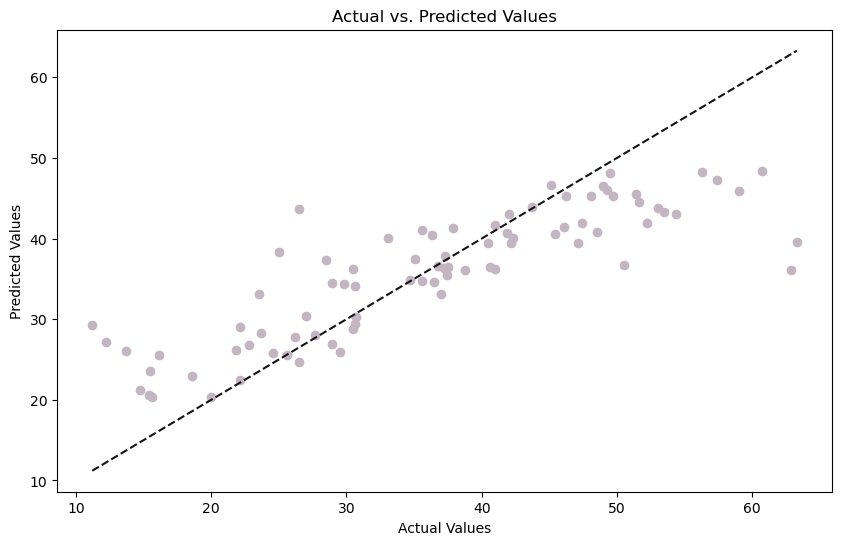

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, c='#c4b5c2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#151314', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()